# Machine Learning Engineer Nanodegree
## Supervised Learning
## Capstone Project  
Bruno Xavier   
June 05, 2018

## Churn Identification Using Machine Learning  

A common problem across businesses in many industries is that of employee churn. Businesses often must invest substantial amounts retaining and training employees, so every time an employee leaves it represents a significant investment lost. Both time and effort then need to be channeled into replacing them. Being able to predict when an employee is likely to leave and offer them incentives to stay can offer huge savings to a business. This is the essence of employee churn prediction; how can we quantify how and when an employee is likely to churn? Groups initially will be divided into two categories, those employees who’ve left and those who’ve stayed and be treated as a binary classification Supervised Learning problem. As for the problem of why employees leave, the decision feature in which employees either have stayed or left will be put aside and the remaining features will be grouped into nodes and analyzed as to find out which factors increase churn risk.

### Features Description


- Satisfaction level	=	Level of employee satisfaction  
- Last evaluation	=	Last performance evaluation review score  
- Number of Projects	=	Number of projects completed while at work  
- Avg. Monthly Hours	=	Average monthly hours at workplace  
- Time Spend Company	=	Number of years spent in the company  
- Work Accident	=	Has the employee had a workplace accident  
- Promotion last 5 years	=	Was employee promoted in the last 5 years  
- Sales 	=	Which department does employee work  
- Salary 	=	Relative level of salary (low, med, high)  
- Left	=	Did the employee churn or not  


## Library Imports and configuration

In [162]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
from random import sample  
from sklearn.linear_model import LogisticRegression  
from sklearn import tree, grid_search 
from sklearn.ensemble import RandomForestClassifier  
from sklearn.svm import SVC  
from sklearn.cross_validation import cross_val_score  
from sklearn import metrics  
from sklearn.metrics import confusion_matrix
from IPython.display import Image, display, HTML  
from pydotplus import graph_from_dot_data 
from matplotlib import rcParams
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
 
rcParams['patch.force_edgecolor'] = True
rcParams['patch.facecolor'] = 'b'

sns.set(style='whitegrid')

%matplotlib inline

## Data Reading, Cleaning and Overview

In this section the dataset is imported and a data sample is presented.  

Initial checks on how much data there is, if there are any missing values, what type of data is within each column

In [163]:
#Import data
df = pd.read_csv('HR_comma_sep.csv')

#Sample column display
display(df.head())

#Extract general information on the dataset.
df.info()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [164]:
# Basic information regarding the target variable 'left'
print ('# of people who have left = {}'.format(len(df[df['left'] == 1]))  )
print ('# of people who have stayed = {}'.format(len(df[df['left'] == 0]))  )
print ('% of people who have left = {}%'.format(round(float(len(df[df['left'] == 1])) / len(df) * 100), 3) )

# of people who have left = 3571
# of people who have stayed = 11428
% of people who have left = 24%


As the data has inconsistencies between employees who left and stayed, this dataset is considered imbalanced with 76% percent of employees staying with the company.

In [165]:
#Check to see if there are any null cells
df.apply(lambda x: sum(x.isnull()), axis=0)

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

Luckily, this data set does not have any null cells. No need for cleaning up data.

In [166]:
# Gather basic statistical data such as mean, min, max and std for each numerical feature
df.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


## Data Exploration

This section analyzes the correlation between the different features and how it relates to churning by targeting the 'left' feature. Various graphs are presented for further interpretation.

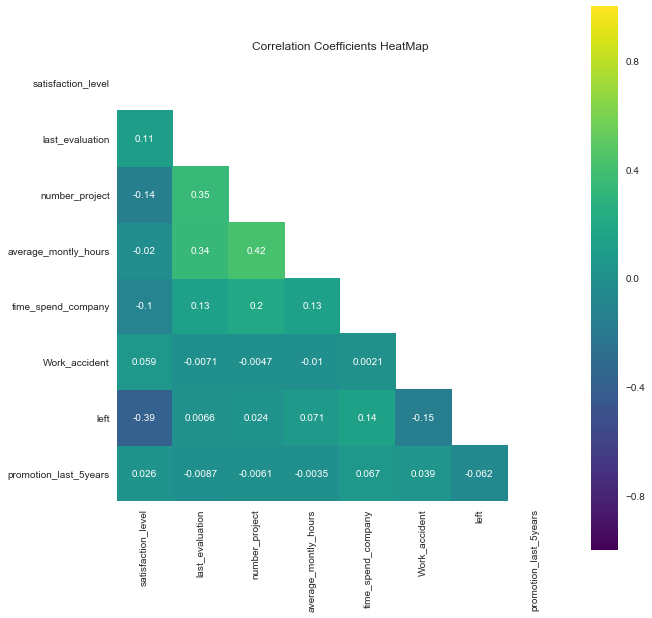

In [167]:
# Correlation Coefficients Heatmap
correlation = df.corr()  
plt.figure(figsize=(10, 10))  
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='viridis', mask = mask)  
plt.title('Correlation Coefficients HeatMap')

With a coefficient of -0.39 satisfaction level is clearly a main factor of employee churning which makes sense.

In [168]:
# Churned employees dataset
df_empl_left = df[df['left'] == 1] 

# Non-churned employees dataset
df_empl_not_left = df[df['left'] == 0]


In the section below all features are going to be correlated with other features and emphasizing on churn ('left').

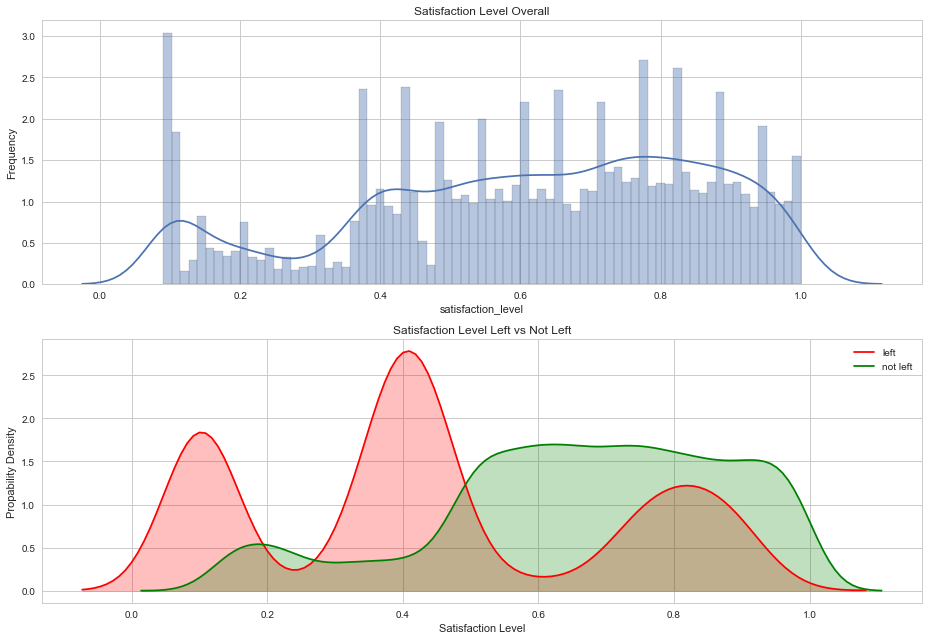

In [169]:
#Overall Employee Satisfaction level plot
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(13,9))
sns.distplot(df['satisfaction_level'], bins=75, ax=ax1)
ax1.set_title('Satisfaction Level Overall')
ax1.set_ylabel('Frequency')

sns.kdeplot(df_empl_left['satisfaction_level'], color='red', ax=ax2, shade=True)
sns.kdeplot(df_empl_not_left['satisfaction_level'], color='green', ax=ax2, shade=True)
ax2.set_title('Satisfaction Level Left vs Not Left')
ax2.legend(['left', 'not left'])
ax2.set_xlabel('Satisfaction Level')
ax2.set_ylabel('Propability Density')

plt.tight_layout()


At medium and lower satisfaction levels are the highest rate of churn.

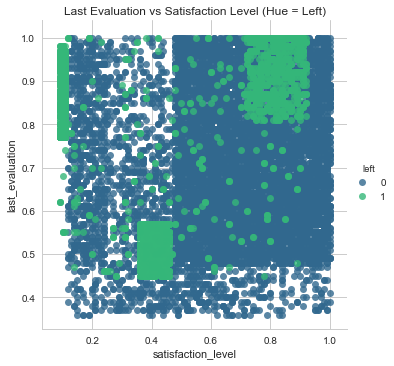

In [170]:
sns.lmplot(x='satisfaction_level', y = 'last_evaluation', hue='left', data=df, palette='viridis',
          fit_reg=False)
plt.title('Last Evaluation vs Satisfaction Level (Hue = Left)')

It seems those highly praised in their evaluations and have a greater satisfaction level tend to leave the company. The opposite seems to work the same way, which probably would be contrary to traditional intuition.

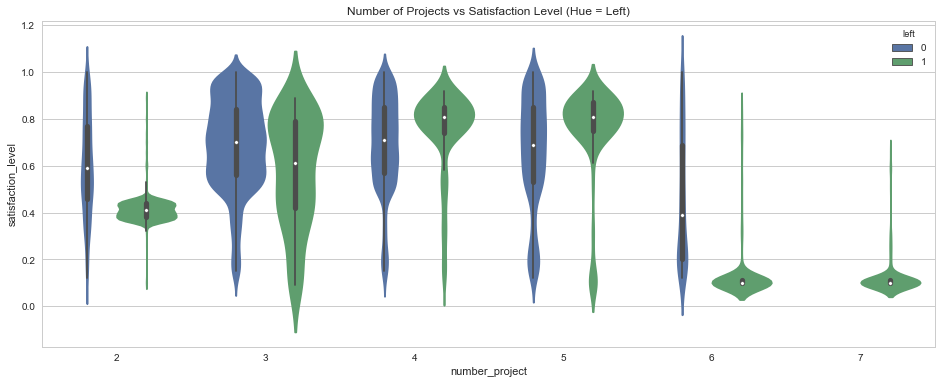

In [171]:
plt.figure(figsize=(16, 6))
sns.violinplot(x='number_project', y='satisfaction_level', data=df, hue='left')
plt.title('Number of Projects vs Satisfaction Level (Hue = Left)')

It seems that when an employee finishes 3 projects, it makes them churn. The higher the satisfaction level and more projects done, the lesser change of churn.

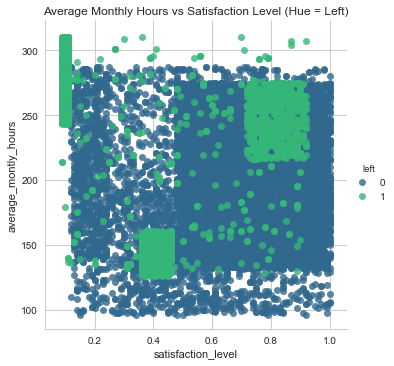

In [172]:
sns.lmplot(x='satisfaction_level', y = 'average_montly_hours', hue='left', data=df, palette='viridis',
          fit_reg=False)
plt.title('Average Monthly Hours vs Satisfaction Level (Hue = Left)')

It seems that higher average working hours and work satisfaction, the more churn there is. Curiously, less satisfaction and lower hours also cause churn.

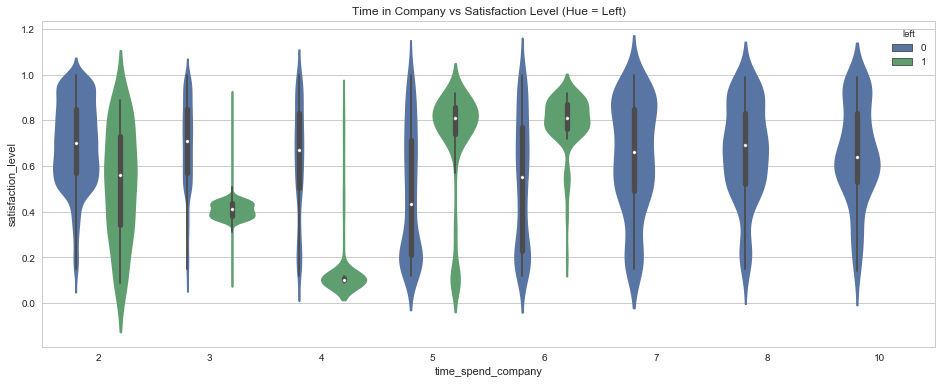

In [173]:
plt.figure(figsize = (16, 6))
sns.violinplot(x='time_spend_company', y='satisfaction_level', data=df, hue='left')
plt.title('Time in Company vs Satisfaction Level (Hue = Left)')

This graph clearly shows that the longer an employee works at a company, the less likely it will move on to another job.

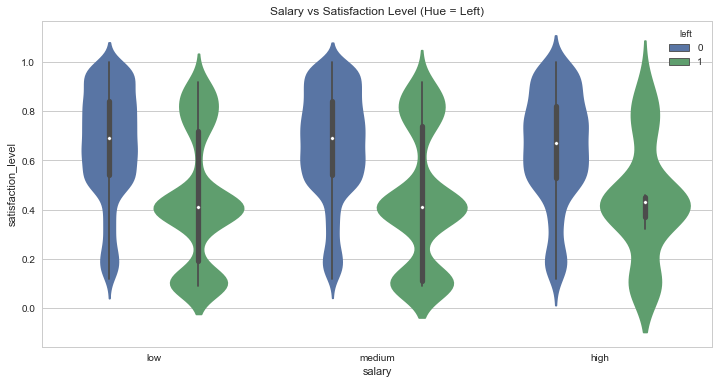

In [174]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='salary', y='satisfaction_level', data=pd.read_csv('HR_comma_sep.csv'), hue='left')
plt.title('Salary vs Satisfaction Level (Hue = Left)')

This graph shows that although satisfaction levels are key to employee not leaving, employees will still leave at medium and lower salaries no matter what level of satisfaction they have.

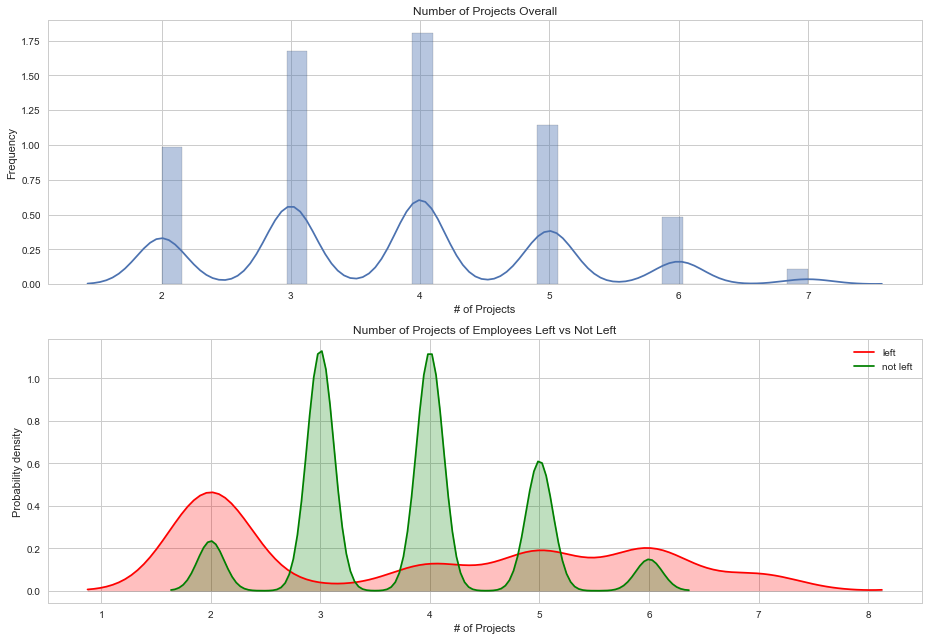

In [175]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(13,9))
sns.distplot(df['number_project'], ax=ax1)
ax1.set_title('Number of Projects Overall')
ax1.set_xlabel('# of Projects')
ax1.set_ylabel('Frequency')

sns.kdeplot(df_empl_left['number_project'], color='red', ax=ax2, shade=True)
sns.kdeplot(df_empl_not_left['number_project'], color='green', ax=ax2, shade=True)
ax2.set_title('Number of Projects of Employees Left vs Not Left')
ax2.legend(['left', 'not left'])
ax2.set_xlabel('# of Projects')
ax2.set_ylabel('Probability density')

plt.tight_layout()

The above graph is hard to reach conclusions as employees left on all number of projects. However at more than seven number of projects most employees just seem to leave. Perhaps looking for other projects to be in so as to try something different.

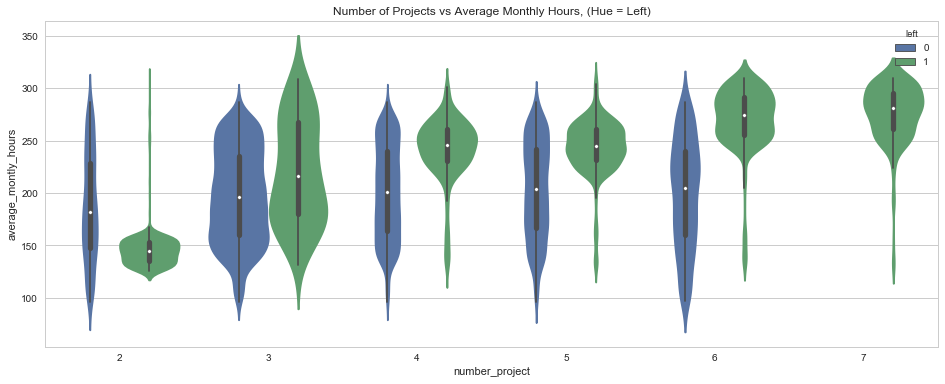

In [176]:
plt.figure(figsize=(16, 6))
sns.violinplot('number_project', 'average_montly_hours', data=df, hue='left')
plt.title('Number of Projects vs Average Monthly Hours, (Hue = Left)')

This graph indicates that the higher number of hours worked in conjunction with a higher number of projects is a recipe for churning.

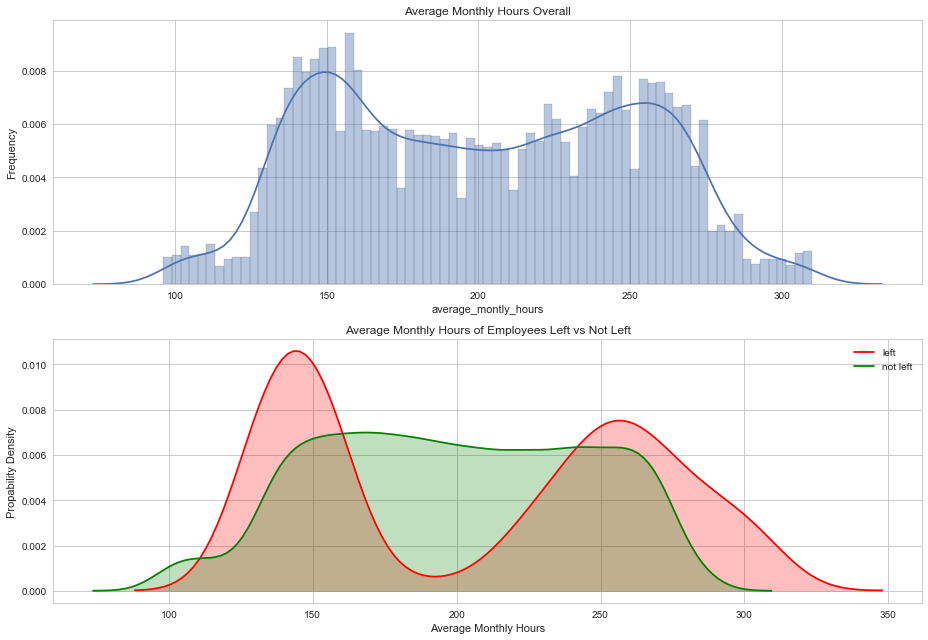

In [177]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(13,9))
sns.distplot(df['average_montly_hours'], bins=75, ax=ax1)
ax1.set_title('Average Monthly Hours Overall')
ax1.set_ylabel('Frequency')

sns.kdeplot(df_empl_left['average_montly_hours'], color='red', ax=ax2, shade=True)
sns.kdeplot(df_empl_not_left['average_montly_hours'], color='green', ax=ax2, shade=True)
ax2.set_title('Average Monthly Hours of Employees Left vs Not Left')
ax2.legend(['left', 'not left'])
ax2.set_xlabel('Average Monthly Hours')
ax2.set_ylabel('Propability Density')

plt.tight_layout()

This graph suggests that ideal workers monthly hours should be around 200 as it has most employees staying with the company with minimun churning.

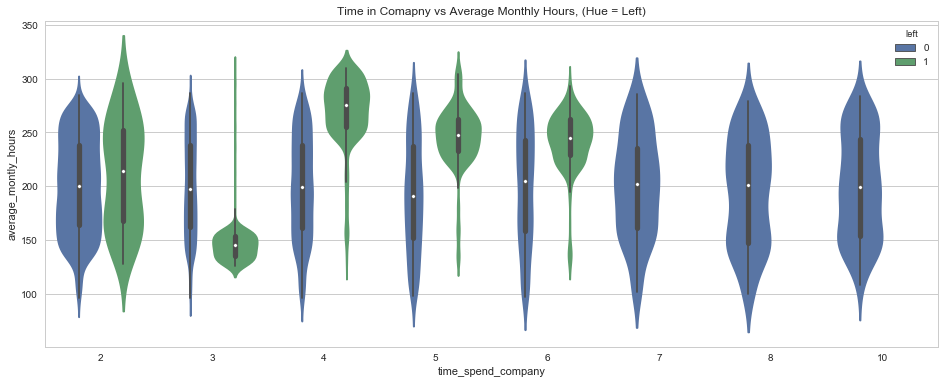

In [178]:
plt.figure(figsize=(16, 6))
sns.violinplot('time_spend_company', 'average_montly_hours', data=df, hue='left')
plt.title('Time in Comapny vs Average Monthly Hours, (Hue = Left)')

From this graph, having higher number of hours for employees who worked more than 7 years at doesn't produce any churning. 

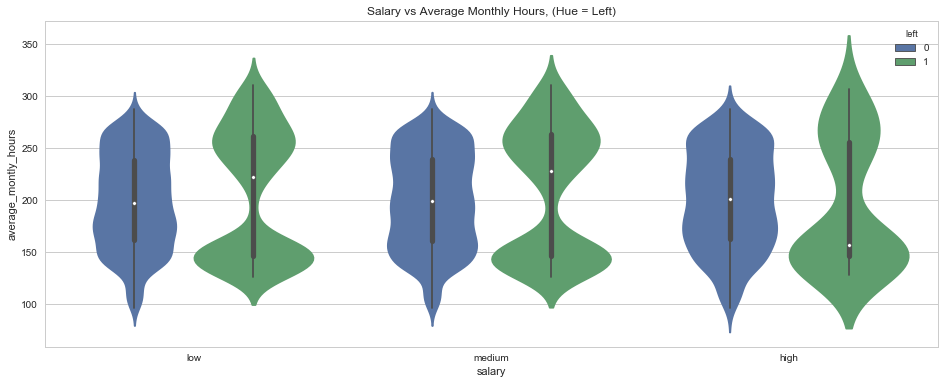

In [179]:
plt.figure(figsize=(16, 6))
sns.violinplot('salary', 'average_montly_hours', data=pd.read_csv('HR_comma_sep.csv'), hue='left')
plt.title('Salary vs Average Monthly Hours, (Hue = Left)')

Keeping work hours around 200 seems to be key in employee retention regardless of salary.

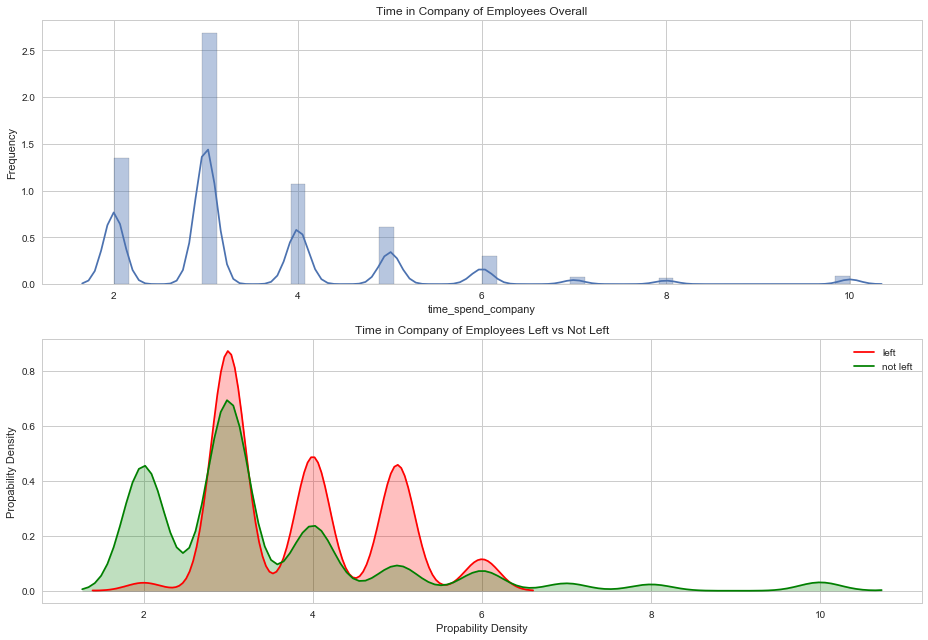

In [180]:
#Let's have a look at the distribution of time in company for different groups of employees

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(13,9))
sns.distplot(df['time_spend_company'], ax=ax1)
ax1.set_title('Time in Company of Employees Overall')
ax1.set_ylabel('Frequency')

sns.kdeplot(df_empl_left['time_spend_company'], color='Red', ax=ax2, shade=True)
sns.kdeplot(df_empl_not_left['time_spend_company'], color='green', ax=ax2, shade=True)
ax2.set_title('Time in Company of Employees Left vs Not Left')
ax2.legend(['left', 'not left'])

ax2.set_xlabel('Propability Density')
ax2.set_ylabel('Propability Density')

plt.tight_layout()

Employees are more likely to churn when they've been at the company between 3 and 5 years. Retaining employees beyond those years reduce churn dramatically.

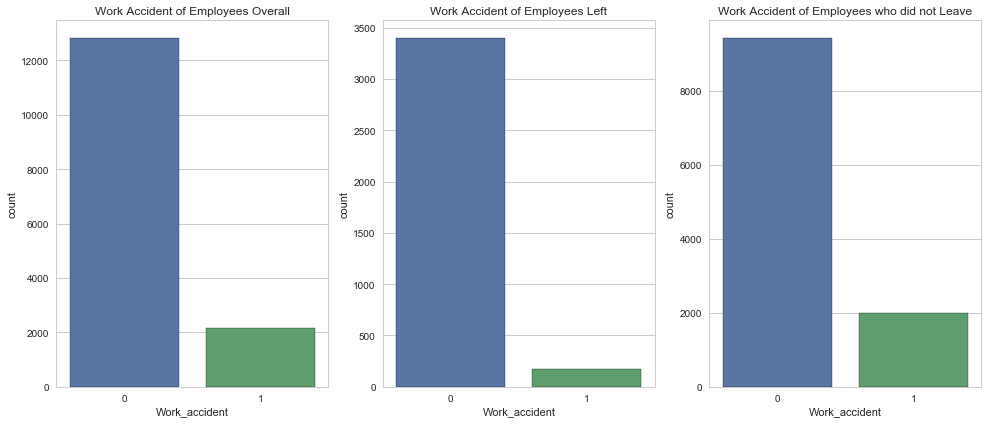

In [181]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(14,6))

sns.countplot(df['Work_accident'], ax=ax1)
ax1.set_title('Work Accident of Employees Overall')

sns.countplot(df_empl_left['Work_accident'], ax=ax2)
ax2.set_title('Work Accident of Employees Left')

sns.countplot(df_empl_not_left['Work_accident'], ax=ax3)
ax3.set_title('Work Accident of Employees who did not Leave')
plt.tight_layout()



Work accidents don't seem to be that big of factor for churning. Without knowledge of what type of accident this feature might not be relevant in the overall learning process

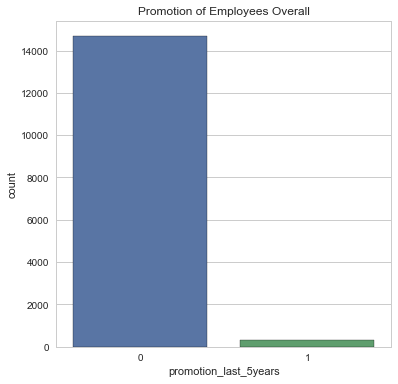

In [182]:
plt.figure(figsize=(6, 6))
sns.countplot(df['promotion_last_5years'])
plt.title('Promotion of Employees Overall')

Promoting employees goes with general logic that employs won't churn at such an event.

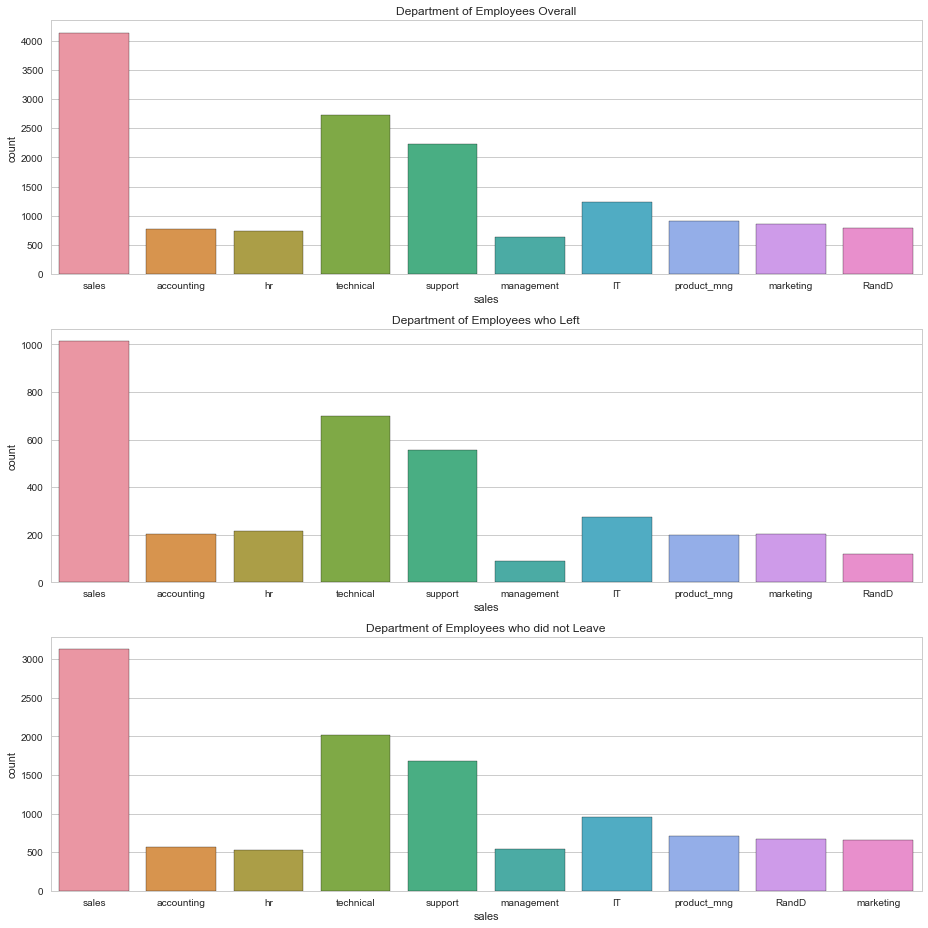

In [183]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(13,13))

sns.countplot(df['sales'], ax=ax1)
ax1.set_title('Department of Employees Overall')

sns.countplot(df_empl_left['sales'], ax=ax2)
ax2.set_title('Department of Employees who Left')

sns.countplot(df_empl_not_left['sales'], ax=ax3)
ax3.set_title('Department of Employees who did not Leave')

plt.tight_layout()

It seems that job position doesn't really affect churning as they seem to stay almost constant.

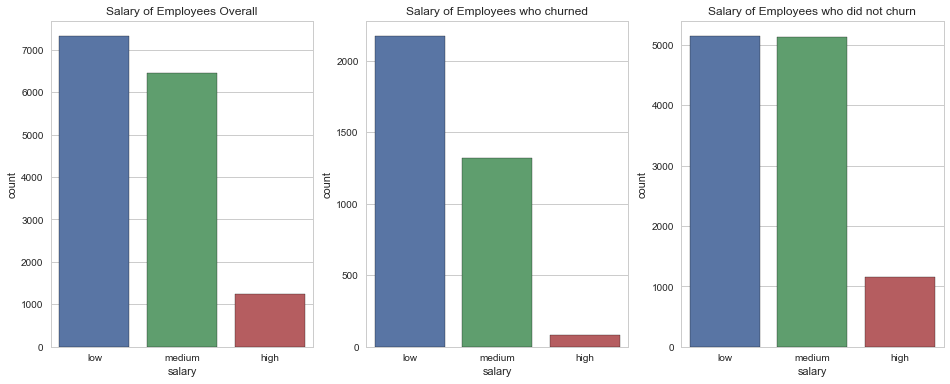

In [184]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 6))
sns.countplot(pd.read_csv('HR_comma_sep.csv')['salary'], ax=ax1)
ax1.set_title('Salary of Employees Overall')

sns.countplot(pd.read_csv('HR_comma_sep.csv')['salary'][pd.read_csv('HR_comma_sep.csv')['left'] == 1], 
              ax=ax2)
ax2.set_title('Salary of Employees who churned')

sns.countplot(pd.read_csv('HR_comma_sep.csv')['salary'][pd.read_csv('HR_comma_sep.csv')['left'] == 0], 
              ax=ax3)
ax3.set_title('Salary of Employees who did not churn')

The main point in this graph is that the higher the salary, the better the company will retain their employees based on the salary feature.

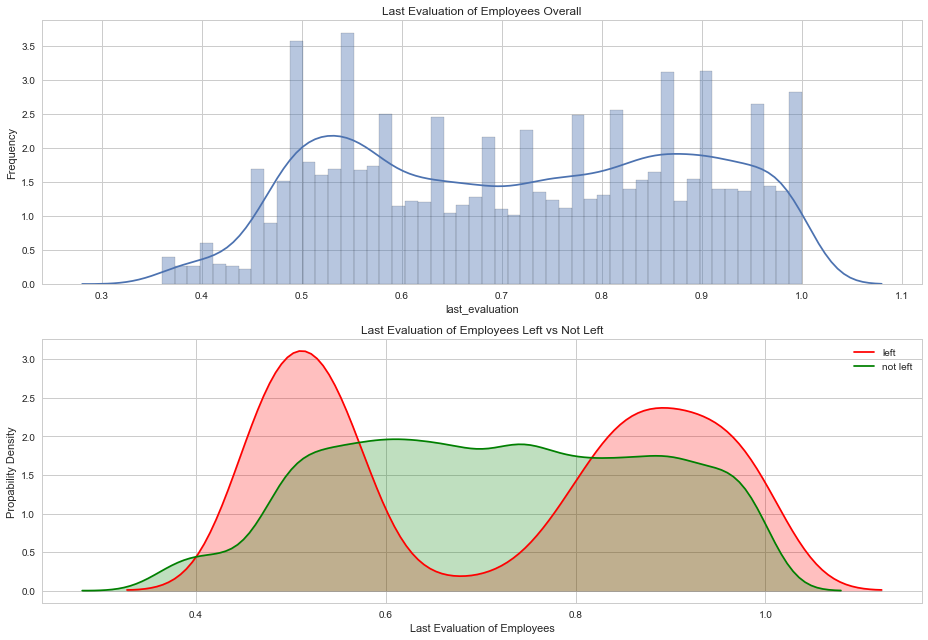

In [185]:
#Let's have a look at the distribution of last evalutaion for different groups of employees

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(13, 9))
sns.distplot(df['last_evaluation'], bins=50, ax=ax1)
ax1.set_title('Last Evaluation of Employees Overall')
ax1.set_ylabel('Frequency')

sns.kdeplot(df_empl_left['last_evaluation'], color='red', ax=ax2, shade=True)
sns.kdeplot(df_empl_not_left['last_evaluation'], color='green', ax=ax2, shade=True)
ax2.set_title('Last Evaluation of Employees Left vs Not Left')
ax2.legend(['left', 'not left'])

ax2.set_xlabel('Last Evaluation of Employees')
ax2.set_ylabel('Propability Density')

plt.tight_layout()

Key takeaway is that having evaluations around 0.7 score seems to be key to hold on to their employees on the last_evaluation feature.

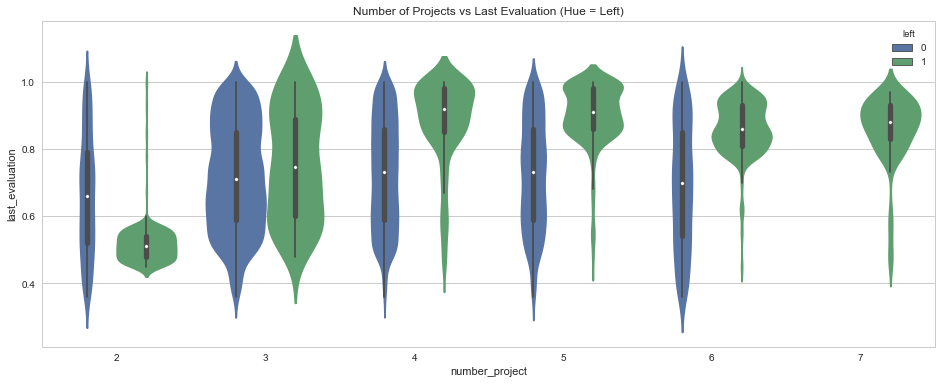

In [186]:
plt.figure(figsize=(16, 6))
sns.violinplot(x='number_project', y='last_evaluation', data=df, hue='left')
plt.title('Number of Projects vs Last Evaluation (Hue = Left)')

Workers seem to churn at high evaluations when they have completed more than 4 projects.

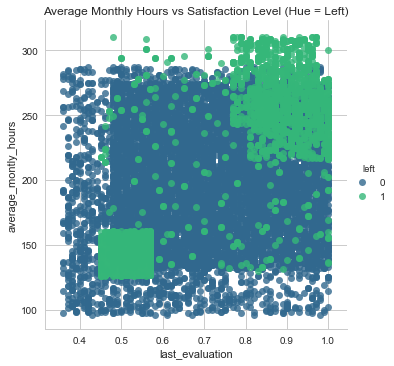

In [187]:
sns.lmplot(x='last_evaluation', y = 'average_montly_hours', hue='left', data=df, palette='viridis',
          fit_reg=False)
plt.title('Average Monthly Hours vs Satisfaction Level (Hue = Left)')

The takeaway is that workers that put less hours and don't have a good evaluation score churn. Workers who have high monthly hours churn regardless of a higher evaluation.

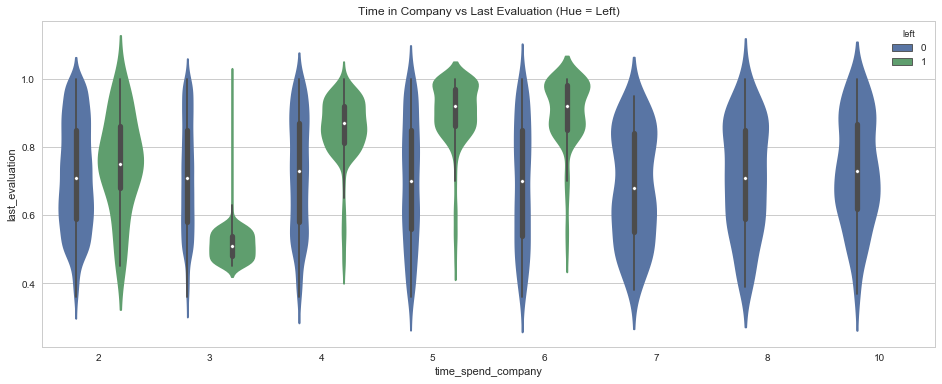

In [188]:
plt.figure(figsize=(16, 6))
sns.violinplot(x='time_spend_company', y='last_evaluation', data=df, hue='left')
plt.title('Time in Company vs Last Evaluation (Hue = Left)')

This graph tells that churn is unlikely on employees that have been longer with the company, independent of evaluation score. There is some churn on high evaluations with employees that have been less than 7 year with the company. Perhaps encouraged of their skills they seek better opportunities.

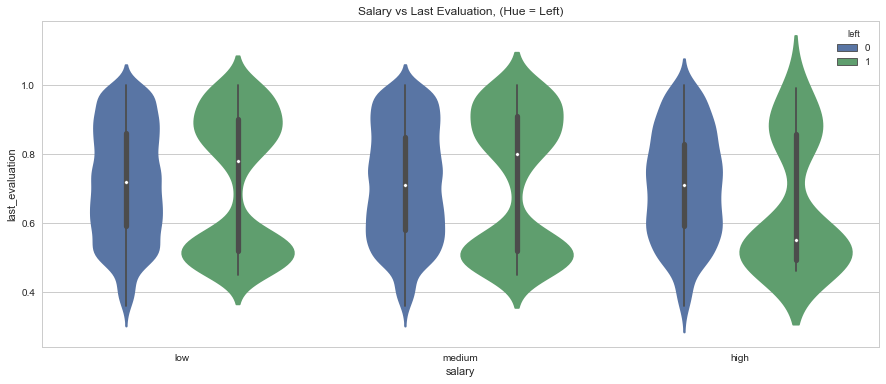

In [189]:
plt.figure(figsize=(15, 6))
sns.violinplot('salary', 'last_evaluation', data=pd.read_csv('HR_comma_sep.csv'), hue='left')
plt.title('Salary vs Last Evaluation, (Hue = Left)')

It seems that independent of salary, having a last evaluation of near 0.7 is key to reducing churn.

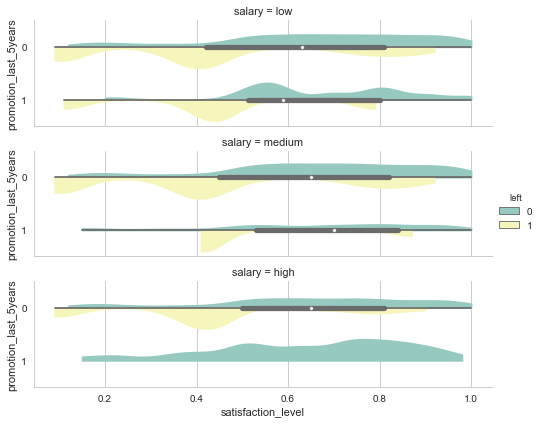

In [190]:
# Factorplot for satisfaction level, promotion over the last 5 years and salary, Hue is 'left' (1 value)
categ_graph2 = sns.factorplot(x="satisfaction_level", y="promotion_last_5years",
                   hue="left", row="salary",
                    data=df,
                    orient="h", size=2, aspect=3.5, palette="Set3",
                    kind="violin", split=True, cut=0, bw=.2)
plt.show()

On lower and medium salaries there is still a significant amount of employee churn even at higher satisfaction levels indicating that salary is another possible contender for most significant features.

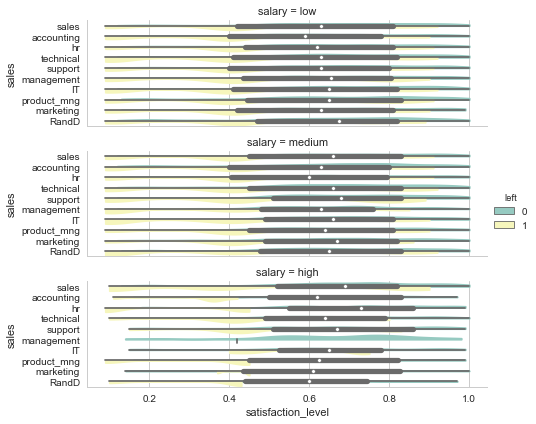

In [191]:
# Factorplot for satisfaction level, sales (employee department) and salary, Hue is 'left' (1 value)
categ_graph2 = sns.factorplot(x="satisfaction_level", y="sales",
                   hue="left", row="salary",
                    data=df,
                    orient="h", size=2, aspect=3.5, palette="Set3",
                    kind="violin", split=True, cut=0, bw=.2)
plt.show()

On this factorplot it doesn't really have any significant indicators that really stand out. I just shows that the lower the employee satisfaction the more churn it will have in all job positions.

## One Hot Encoding of Categorical Features

As seen on the previous 2 plots, it is not easy to extract information from the categorical cells and it is necessary to convert them into quantifiable numbers. That's where one hot encoding comes in handy by transforming those categories into numbers that can be used by the supervised learning algorithm.

In [192]:
# What categories are inside the sales feature
df.sales.unique()


array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [193]:
# What categories are inside the salary feature
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [194]:
# Appends string prior to one hot encoding
df['salary'] = '$_' + df['salary'].astype(str)  
df['sales'] = 'sales_' + df['sales'].astype(str)

# Create 'salary' dummies and join
onehotenc_salary = pd.get_dummies(df['salary'])  
df = df.join(onehotenc_salary)

# Create 'sales' dummies and join
onehotenc_sales = pd.get_dummies(df['sales'])  
df = df.join(onehotenc_sales)

In [195]:
# Drop these features to avoid dummy variable trap
df = df.drop(['salary', 'sales', '$_low', 'sales_IT'], axis=1)  
display(df.head())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,$_high,$_medium,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


## Test, Training and Validating Sets

This dataset will be randomly split between training, testing and validation sets at 60% - train set, 20% - validation set, 20% - test set.

In [196]:
# Randomly, split the data into test/training/validation sets
train, test, validate = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])  
print (train.shape, test.shape, validate.shape)  


# Separate target and predictors
y_train = train['left']  
x_train = train.drop(['left'], axis=1)  
y_test = test['left']  
x_test = test.drop(['left'], axis=1)  
y_validate = validate['left']  
x_validate = validate.drop(['left'], axis=1)

(8999, 19) (3000, 19) (3000, 19)


Below are checks on the balance of the splits on y_.

In [197]:
y_test.mean()

0.238

In [198]:
y_train.mean()

0.2400266696299589

Feature importance will be extracted using the Random Forest Classifier.

In [199]:
rf = RandomForestClassifier() 
rf.fit(x_train, y_train)  

print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), x_train), reverse=True))  

Features sorted by their score:
[(0.26800000000000002, 'satisfaction_level'), (0.2356, 'number_project'), (0.1885, 'time_spend_company'), (0.1482, 'average_montly_hours'), (0.1144, 'last_evaluation'), (0.0097999999999999997, 'Work_accident'), (0.0060000000000000001, '$_medium'), (0.0057999999999999996, '$_high'), (0.0044999999999999997, 'sales_technical'), (0.0041000000000000003, 'sales_support'), (0.0041000000000000003, 'sales_sales'), (0.0018, 'sales_hr'), (0.0018, 'sales_RandD'), (0.0018, 'promotion_last_5years'), (0.0015, 'sales_product_mng'), (0.0015, 'sales_accounting'), (0.0012999999999999999, 'sales_management'), (0.0011999999999999999, 'sales_marketing')]


<Container object of 18 artists>

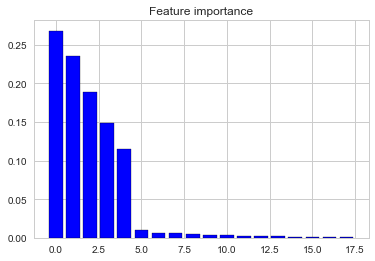

In [200]:
#Plotting the feature importance
importances = rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importance")
plt.bar(range(x_train.shape[1]), importances[indices], color="b", yerr=std[indices], align="center")

The first 5 features are the most representative and thus the other features can be dropped as they create that much more variance. 

Therefore only the top 5 features will be used as the others don't get much more significant variance.

In [201]:
# New variable list and drop.
all_vars = x_train.columns.tolist()
top_5_vars = ['satisfaction_level', 'number_project', 'time_spend_company',
              'average_montly_hours', 'last_evaluation']
bottom_vars = [cols for cols in all_vars if cols not in top_5_vars]

In [202]:
# Drop the non necessary variables not included in the top 5.
x_train    = x_train.drop(bottom_vars, axis=1)
x_test     = x_test.drop(bottom_vars, axis=1)
x_validate = x_validate.drop(bottom_vars, axis=1)

## Benchmark Model & Evaluation Metrics
The benchmark model will be the logistic regression model’s accuracy, F1-score, precision and recall scores. Given that TP is the number of true positives, TN is the number of true negatives, FP is the number of false positives and FN is the number of false negatives:  

- Accuracy is defined as A(M)=(TN+TP)/(TN+FP+FN+TP) , which measures how often the model predicts correctly.  

- Recall = TP/(TP+FN) , which states how well the model identifies those who churn.  

- Precision = TP/(TP+FP)  , which states how believable is the model.
- F1 Score = (2*(Precision * Recall))/(Precision + Recall), which is the balance between precision and recall.


## Supervised Learning Modeling

This part will start with logistic regression modeling as it is part of our benchmark.
It will then proceed to decision trees, random forest and SVM.

In [203]:
# LOGISTIC REGRESSION
logit_model = LogisticRegression()
logit_model = logit_model.fit(x_train, y_train)
logit_model.score(x_train, y_train)


# Predictions on the test dataset
predicted = pd.DataFrame(logit_model.predict(x_test))

# Probabilities on the test dataset
probs = pd.DataFrame(logit_model.predict_proba(x_test))

# Store metrics
logit_accuracy = metrics.accuracy_score(y_test, predicted)
logit_roc_auc = metrics.roc_auc_score(y_test, probs[1])
logit_confus_matrix = metrics.confusion_matrix(y_test, predicted)
logit_classification_report = metrics.classification_report(y_test, predicted)
logit_precision = metrics.precision_score(y_test, predicted, pos_label=1)
logit_recall = metrics.recall_score(y_test, predicted, pos_label=1)
logit_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
logit_cv_scores = cross_val_score(LogisticRegression(), x_test, y_test, scoring='precision', cv=10)
logit_cv_mean = np.mean(logit_cv_scores)

In [204]:
# Predictions on the test dataset
predicted = pd.DataFrame(logit_model.predict(x_test))  

# Probabilities on the test dataset
probs = pd.DataFrame(logit_model.predict_proba(x_test))  
print (metrics.accuracy_score(y_test, predicted))

0.760333333333


In [205]:
#Confusion matrix
print (metrics.confusion_matrix(y_test, predicted) )

[[2091  195]
 [ 524  190]]


In [206]:
#Logistic Regression Metrics
print (metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85      2286
          1       0.49      0.27      0.35       714

avg / total       0.73      0.76      0.73      3000



In [207]:
# DECISION TREE (depth of 3)
tree_model = tree.DecisionTreeClassifier(max_depth=3)
# Fit a decision tree
tree_model = tree_model.fit(x_train, y_train)
# Training accuracy
tree_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(tree_model.predict(x_test))
probs = pd.DataFrame(tree_model.predict_proba(x_test))

# Store metrics
tree_accuracy = metrics.accuracy_score(y_test, predicted)
tree_roc_auc = metrics.roc_auc_score(y_test, probs[1])
tree_confus_matrix = metrics.confusion_matrix(y_test, predicted)
tree_classification_report = metrics.classification_report(y_test, predicted)
tree_precision = metrics.precision_score(y_test, predicted, pos_label=1)
tree_recall = metrics.recall_score(y_test, predicted, pos_label=1)
tree_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
tree_cv_scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=3),
                                x_test, y_test, scoring='precision', cv=10)
tree_cv_mean = np.mean(tree_cv_scores)

  

In [208]:
# RANDOM FOREST
rf = RandomForestClassifier()  
# Fit
rf_model = rf.fit(x_train, y_train)  
# Training accuracy
rf_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(rf_model.predict(x_test))  
probs = pd.DataFrame(rf_model.predict_proba(x_test))

# Store metrics
rf_accuracy = metrics.accuracy_score(y_test, predicted)  
rf_roc_auc = metrics.roc_auc_score(y_test, probs[1])  
rf_confus_matrix = metrics.confusion_matrix(y_test, predicted)  
rf_classification_report = metrics.classification_report(y_test, predicted)  
rf_precision = metrics.precision_score(y_test, predicted, pos_label=1)  
rf_recall = metrics.recall_score(y_test, predicted, pos_label=1)  
rf_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
rf_cv_scores = cross_val_score(RandomForestClassifier(), x_test, y_test, 
                               scoring='precision', cv=10)  
rf_cv_mean = np.mean(rf_cv_scores)  

In [209]:
# SVM
svm_model = SVC(probability=True)  
# Fit
svm_model = svm_model.fit(x_train, y_train)  
# Accuracy
svm_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(svm_model.predict(x_test))  
probs = pd.DataFrame(svm_model.predict_proba(x_test))

# Store metrics
svm_accuracy = metrics.accuracy_score(y_test, predicted)  
svm_roc_auc = metrics.roc_auc_score(y_test, probs[1])  
svm_confus_matrix = metrics.confusion_matrix(y_test, predicted)  
svm_classification_report = metrics.classification_report(y_test, predicted)  
svm_precision = metrics.precision_score(y_test, predicted, pos_label=1)  
svm_recall = metrics.recall_score(y_test, predicted, pos_label=1)  
svm_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
svm_cv_scores = cross_val_score(SVC(probability=True), x_test, y_test, scoring='precision', cv=10)  
svm_cv_mean = np.mean(svm_cv_scores) 

In [210]:
# Model comparison
models = pd.DataFrame({
    ' Model'    : [("Logistic Regression"), ('Decision Tree'), ('Random Forest'), ('SVM')],
    'Accuracy' : [logit_accuracy, tree_accuracy, rf_accuracy, svm_accuracy],
    'Precision': [logit_precision, tree_precision, rf_precision, svm_precision],
    'recall'   : [logit_recall, tree_recall, rf_recall, svm_recall],
    'F1'       : [logit_f1, tree_f1, rf_f1, svm_f1],
    'cv_precision' : [logit_cv_mean, tree_cv_mean, rf_cv_mean, svm_cv_mean]
    })

models.sort_values(by='Precision', ascending=False)

,Model,Accuracy,F1,Precision,cv_precision,recall
2,Random Forest,0.987333,0.973050,0.985632,0.987848,0.960784
3,SVM,0.956000,0.909091,0.894309,0.877560,0.924370
1,Decision Tree,0.952333,0.901853,0.884253,0.880133,0.920168
0,Logistic Regression,0.760333,0.345769,0.493506,0.531342,0.266106


Since random forest had the best F1, cv_precision and recall scores, it is safe to assume that it would be the best model among the ones tested to implement in this project.

## Parameter Tuning

After obtaining the main score, it will be necessary to tune the models and compare to the unoptmized model versions to guarantee best precision and recall scores. Below are the unoptimized parameters:

In [238]:
from pprint import pprint
print ('These are the Logistic Regression Unoptimized Parameters: ')
pprint(logit_model.get_params())
print()
print ('These are the Decision Trees Unoptimized Parameters: ')
pprint(tree_model.get_params())
print()
print ('These are the Random Forest Unoptimized Parameters: ')
pprint(rf.get_params())
print()
print ('These are the SVM Unoptimized Parameters: ')
pprint(svm_model.get_params())

These are the Logistic Regression Unoptimized Parameters: 
{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

These are the Decision Trees Unoptimized Parameters: 
{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

These are the Random Forest Unoptimized Parameters: 
{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_j

Here the Logistic Regression model will be tuned:

In [260]:
param_gridLR = {
                
                "solver": ['sag','lbfgs','newton-cg','liblinear'],
                "C": [1, 2, 4],
              
                "max_iter": [10,25, 50, 100, 150,200],
              
              }

grid_searchLR = GridSearchCV(logit_model, param_gridLR, cv=10)
grid_fitLR = grid_searchLR.fit(x_train, y_train)

grid_searchLR.best_params_
print (grid_searchLR.best_params_)

C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converg

C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converg

C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\bruno\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


{'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}


In [261]:
best_clfLR = grid_fitLR.best_estimator_
print ("Best classifier is:", best_clfLR)
# Save predictions using the unoptimized and model
predictionsLR = (rf.fit(x_train, y_train)).predict(x_test)
best_predictionsLR = best_clfLR.predict(x_test) 

Best classifier is: LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)


In [262]:
#Saving Metrics
lr_accuracy2 = accuracy_score(y_test, best_predictionsLR )
lr_f1_2 = f1_score(y_test, best_predictionsLR)
lr_recall2 = recall_score(y_test, best_predictionsLR )
lr_precision2 = precision_score(y_test, best_predictionsLR )

In [263]:
modelsLR = pd.DataFrame({
    ' Model'    : [('Logistic Regression')],
    'Accuracy' : [lr_accuracy2],
    'Precision': [lr_precision2],
    'recall'   : [lr_recall2],
    'F1'       : [lr_f1_2]
    })

modelsLR.sort_values(by='Precision', ascending=False)

,Model,Accuracy,F1,Precision,recall
0,Logistic Regression,0.760333,0.345769,0.493506,0.266106


Here the Decision Trees model will be tuned:

In [213]:
param_gridDT = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

grid_searchDT = GridSearchCV(tree_model, param_gridDT, cv=10)
grid_fitDT = grid_searchDT.fit(x_train, y_train)

grid_searchDT.best_params_
print (grid_searchDT.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [214]:
best_clfDT = grid_fitDT.best_estimator_
print ("Best classifier is:", best_clfDT)
# Save predictions using the unoptimized and model
predictionsDT = (rf.fit(x_train, y_train)).predict(x_test)
best_predictionsDT = best_clfDT.predict(x_test) 

Best classifier is: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [215]:
#Saving Metrics
dt_accuracy2 = accuracy_score(y_test, best_predictionsDT )
dt_f1_2 = f1_score(y_test, best_predictionsDT)
dt_recall2 = recall_score(y_test, best_predictionsDT )
dt_precision2 = precision_score(y_test, best_predictionsDT )

In [216]:
modelsDT = pd.DataFrame({
    ' Model'    : [('Decision tree')],
    'Accuracy' : [dt_accuracy2],
    'Precision': [dt_precision2],
    'recall'   : [dt_recall2],
    'F1'       : [dt_f1_2]
    })

modelsDT.sort_values(by='Precision', ascending=False)

,Model,Accuracy,F1,Precision,recall
0,Decision tree,0.98,0.956958,0.980882,0.934174


Here the Random Forest model will be tuned:

In [217]:
# Number of trees in random forest
n_estimators = [5, 10, 15]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,30,50]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

#Create parameter grid
param_gridRF = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


grid_searchRF = GridSearchCV(rf, param_gridRF, cv=10)
grid_fitRF = grid_searchRF.fit(x_train, y_train)

grid_searchRF.best_params_
print (grid_searchRF.best_params_)

{'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [218]:
best_clfRF = grid_fitRF.best_estimator_
print ("Best classifier is:", best_clfRF)
# Save predictions using the unoptimized and model
predictionsRF = (rf.fit(x_train, y_train)).predict(x_test)
best_predictionsRF = best_clfRF.predict(x_test) 

Best classifier is: RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [219]:
#Saving Metrics
rf_accuracy2 = accuracy_score(y_test, best_predictionsRF )
rf_f1_2 = f1_score(y_test, best_predictionsRF)
rf_recall2 = recall_score(y_test, best_predictionsRF )
rf_precision2 = precision_score(y_test, best_predictionsRF )

In [220]:
modelsRF = pd.DataFrame({
    ' Model'    : [('Random Forest')],
    'Accuracy' : [rf_accuracy2],
    'Precision': [rf_precision2],
    'recall'   : [rf_recall2],
    'F1'       : [rf_f1_2]
    })

modelsRF.sort_values(by='Precision', ascending=False)

,Model,Accuracy,F1,Precision,recall
0,Random Forest,0.989,0.976645,0.987124,0.966387


Here the SVM model will be tuned testing different penalty parameters C of the error term.

In [270]:
#Tune C parameter
Cs = [0.1, 1, 10]
param_gridSVM = {'C': Cs}
grid_searchSVM = GridSearchCV(svm.SVC(kernel='rbf'), param_gridSVM, cv=10)
grid_fitSVM = grid_searchSVM.fit(x_train, y_train)

grid_searchSVM.best_params_
print (grid_searchSVM.best_params_)

{'C': 10}


In [271]:
#Identify Best Classifier
best_clfSVM = grid_fitSVM.best_estimator_
print ("Best classifier is:", best_clfSVM)
# Save predictions using the unoptimized and model
predictionsSVM = (svm_model.fit(x_train, y_train)).predict(x_test)
best_predictionsSVM = best_clfSVM.predict(x_test) 

Best classifier is: SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [272]:
#Saving Metrics
svm_accuracy2 = accuracy_score(y_test, best_predictionsSVM )
svm_f1_2 = f1_score(y_test, best_predictionsSVM)
svm_recall2 = recall_score(y_test, best_predictionsSVM )
svm_precision2 = precision_score(y_test, best_predictionsSVM )

In [273]:
modelsSVM = pd.DataFrame({
    ' Model'    : [('SVM')],
    'Accuracy' : [svm_accuracy2],
    'Precision': [svm_precision2],
    'recall'   : [svm_recall2],
    'F1'       : [svm_f1_2]
    })

modelsSVM.sort_values(by='Precision', ascending=False)



,Model,Accuracy,F1,Precision,recall
0,SVM,0.965333,0.926864,0.930791,0.922969


The tuned up models will be rerun and their metrics saved in this section. Optimized Score grid will be printed and compared with the unoptimized score grid.

In [264]:
# LOGISTIC REGRESSION Tuned Up
logit_model = LogisticRegression(C= 1, max_iter= 100, solver='lbfgs')
logit_model = logit_model.fit(x_train, y_train)
logit_model.score(x_train, y_train)


# Predictions on the test dataset
predicted = pd.DataFrame(logit_model.predict(x_test))

# Probabilities on the test dataset
probs = pd.DataFrame(logit_model.predict_proba(x_test))

# Store metrics
logit_accuracy = metrics.accuracy_score(y_test, predicted)
logit_roc_auc = metrics.roc_auc_score(y_test, probs[1])
logit_confus_matrix = metrics.confusion_matrix(y_test, predicted)
logit_classification_report = metrics.classification_report(y_test, predicted)
logit_precision = metrics.precision_score(y_test, predicted, pos_label=1)
logit_recall = metrics.recall_score(y_test, predicted, pos_label=1)
logit_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
logit_cv_scores = cross_val_score(LogisticRegression(), x_test, y_test, scoring='precision', cv=10)
logit_cv_mean = np.mean(logit_cv_scores)

In [265]:
# Predictions on the test dataset Tuned Up
predicted = pd.DataFrame(logit_model.predict(x_test))  

# Probabilities on the test dataset Tuned Up
probs = pd.DataFrame(logit_model.predict_proba(x_test))  
print (metrics.accuracy_score(y_test, predicted))

0.760333333333


In [266]:
#Confusion matrix Tuned Up
print (metrics.confusion_matrix(y_test, predicted) )

[[2091  195]
 [ 524  190]]


In [267]:
#Logistic Regression Metrics Tuned Up
print (metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85      2286
          1       0.49      0.27      0.35       714

avg / total       0.73      0.76      0.73      3000



In [268]:
# DECISION TREE Tuned Up
tree_model = tree.DecisionTreeClassifier(
            class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
# Fit a decision tree
tree_model = tree_model.fit(x_train, y_train)
# Training accuracy
tree_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(tree_model.predict(x_test))
probs = pd.DataFrame(tree_model.predict_proba(x_test))

# Store metrics
tree_accuracy = metrics.accuracy_score(y_test, predicted)
tree_roc_auc = metrics.roc_auc_score(y_test, probs[1])
tree_confus_matrix = metrics.confusion_matrix(y_test, predicted)
tree_classification_report = metrics.classification_report(y_test, predicted)
tree_precision = metrics.precision_score(y_test, predicted, pos_label=1)
tree_recall = metrics.recall_score(y_test, predicted, pos_label=1)
tree_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
tree_cv_scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=3),
                                x_test, y_test, scoring='precision', cv=10)
tree_cv_mean = np.mean(tree_cv_scores)

In [269]:
# RANDOM FOREST Tuned Up
rf = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)  
# Fit
rf_model = rf.fit(x_train, y_train)  
# Training accuracy
rf_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(rf_model.predict(x_test))  
probs = pd.DataFrame(rf_model.predict_proba(x_test))

# Store metrics
rf_accuracy = metrics.accuracy_score(y_test, predicted)  
rf_roc_auc = metrics.roc_auc_score(y_test, probs[1])  
rf_confus_matrix = metrics.confusion_matrix(y_test, predicted)  
rf_classification_report = metrics.classification_report(y_test, predicted)  
rf_precision = metrics.precision_score(y_test, predicted, pos_label=1)  
rf_recall = metrics.recall_score(y_test, predicted, pos_label=1)  
rf_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
rf_cv_scores = cross_val_score(RandomForestClassifier(), x_test, y_test, 
                               scoring='precision', cv=10)  
rf_cv_mean = np.mean(rf_cv_scores)  

In [277]:
# SVM Tuned Up
svm_model = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)  
# Fit
svm_model = svm_model.fit(x_train, y_train)  
# Accuracy
svm_model.score(x_train, y_train)

# Predictions/probs on the test dataset
predicted = pd.DataFrame(svm_model.predict(x_test))  
probs = pd.DataFrame(svm_model.predict_proba(x_test))

# Store metrics
svm_accuracy = metrics.accuracy_score(y_test, predicted)  
svm_roc_auc = metrics.roc_auc_score(y_test, probs[1])  
svm_confus_matrix = metrics.confusion_matrix(y_test, predicted)  
svm_classification_report = metrics.classification_report(y_test, predicted)  
svm_precision = metrics.precision_score(y_test, predicted, pos_label=1)  
svm_recall = metrics.recall_score(y_test, predicted, pos_label=1)  
svm_f1 = metrics.f1_score(y_test, predicted, pos_label=1)

# Evaluate the model using 10-fold cross-validation
svm_cv_scores = cross_val_score(SVC(probability=True), x_test, y_test, scoring='precision', cv=10)  
svm_cv_mean = np.mean(svm_cv_scores) 

In [278]:
# Model comparison
models2 = pd.DataFrame({
    ' Model'    : [("Logistic Regression"), ('Decision Tree'), ('Random Forest'), ('SVM')],
    'Accuracy' : [logit_accuracy, tree_accuracy, rf_accuracy, svm_accuracy],
    'Precision': [logit_precision, tree_precision, rf_precision, svm_precision],
    'recall'   : [logit_recall, tree_recall, rf_recall, svm_recall],
    'F1'       : [logit_f1, tree_f1, rf_f1, svm_f1],
    'cv_precision' : [logit_cv_mean, tree_cv_mean, rf_cv_mean, svm_cv_mean]
    })

models2.sort_values(by='Precision', ascending=False)

,Model,Accuracy,F1,Precision,cv_precision,recall
2,Random Forest,0.989333,0.977305,0.989943,0.987973,0.964986
1,Decision Tree,0.979667,0.956272,0.979442,0.880133,0.934174
3,SVM,0.965333,0.926864,0.930791,0.877560,0.922969
0,Logistic Regression,0.760333,0.345769,0.493506,0.531342,0.266106


In [244]:
models.sort_values(by='Precision', ascending=False)

,Model,Accuracy,F1,Precision,cv_precision,recall
2,Random Forest,0.987333,0.973050,0.985632,0.987848,0.960784
3,SVM,0.956000,0.909091,0.894309,0.877560,0.924370
1,Decision Tree,0.952333,0.901853,0.884253,0.880133,0.920168
0,Logistic Regression,0.760333,0.345769,0.493506,0.531342,0.266106


In [279]:
print (rf_cv_scores)

[ 1.          1.          1.          0.98550725  0.97058824  1.
  0.97014925  0.97014925  0.98333333  1.        ]
